# TYPES OF RECOMMENDATION SYSTEM
## 1. Content based filtering
## 2. Collaborative filtering:
<img src="reccom_sys.jpg"/>


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Exploring MovieLens Dataset

In [2]:
#reading data
movies=pd.read_csv('D:/2nd Sem/PatternRecog/Project/ml-latest/ml-latest/movies.csv')
ratings=pd.read_csv('D:/2nd Sem/PatternRecog/Project/ml-latest/ml-latest/ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print(movies.shape)

(58098, 3)


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [6]:
print(ratings.shape)

(27753444, 4)


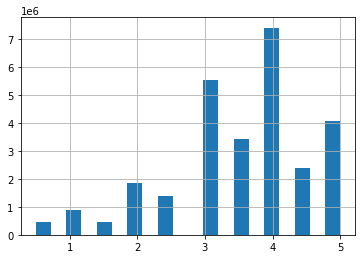

In [7]:
ratings['rating'].hist(bins=20)

In [8]:
ratings['rating'].describe()

count    2.775344e+07
mean     3.530445e+00
std      1.066353e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [9]:
f"We have {len(ratings.userId.unique())} unique user ids in the data"

'We have 283228 unique user ids in the data'

# 19 Different GENRE
<img src="genre.jpg"/>

## Procedure to create Average Genre Rating

In [15]:
#preprocessing
ratings=ratings.drop(['timestamp'],axis=1)
data=pd.merge(ratings,movies,how='outer',on ='movieId')
data=data.dropna()
data.head()

,userId,movieId,rating,title,genres
0,1.0,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6.0,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56.0,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71.0,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84.0,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [10]:
#Creating seperate column for each genre
dummies = movies['genres'].str.get_dummies()
dummies=movies.join(dummies)
#droping genre and title column
dummies.drop(['genres','title'],axis=1,inplace = True)
dummies.head()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#getting column(genre) names
col=dummies.columns
col=col.drop(['movieId','(no genres listed)'])
print(col)

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [13]:
#creating empty dataframe to store avg. genre rating for each user
avg_rating = pd.DataFrame(columns = col)
avg_rating["userId"] = ""
avg_rating.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId


In [16]:
#considering those users who have rated more than 100 movies
rating_stats= data.groupby('userId').agg({'rating': [np.size, np.mean]})
rating_stats = rating_stats.sort_values([('rating','size')],ascending=False)
rating_stats.head()

rating          
             size      mean
userId                     
123100.0  23715.0  3.130635
117490.0   9279.0  3.278424
134596.0   8381.0  3.198306
212343.0   7884.0  2.588026
242683.0   7515.0  3.208317

In [17]:
top_user=rating_stats[ rating_stats[('rating','size')]<100].index
rating_stats.drop(top_user, inplace = True)
r=rating_stats.index

In [18]:
#userId of users who have rated more than 100 movies are stored in variable r
r

Float64Index([123100.0, 117490.0, 134596.0, 212343.0, 242683.0, 111908.0,
               77609.0,  63783.0, 172357.0, 141955.0,
              ...
              150933.0,  91199.0, 186263.0, 232018.0,  30868.0, 158174.0,
              233276.0, 259341.0, 210336.0, 238389.0],
             dtype='float64', name='userId', length=68342)

In [19]:
#filing avg.rating dataframe for each user
iteration=0
for j in r:
    iteration+=1
    temp=ratings[(ratings["userId"] == j)]
    temp2=pd.merge(temp,dummies,how='outer',on ='movieId')
    temp2=temp2.dropna()
    avg={}
    for i in range(len(col)):
        temp3=(temp2[temp2[col[i]] == 1])
        if temp3.shape[0]==0:
            temp5=0
        else:
            temp4=np.sum(temp3.rating * temp3[col[i]])
            temp5=temp4/temp3.shape[0]
        avg[col[i]]=temp5
    avg['userId']=j
    avg_rating=avg_rating.append(avg, ignore_index = True)
    if iteration==5:
        break

In [26]:
avg_rating.head()
# avg_rating.to_csv('avg_rating1.csv')

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId
0,2.975730,3.102523,3.287429,3.153435,3.065647,3.112014,3.429535,3.200078,3.059346,3.125740,2.741440,3.104027,3.245098,3.061500,3.133494,2.875280,2.955449,3.280059,3.114849,123100.0
1,3.218675,3.278409,3.430952,3.277123,3.198239,3.317562,3.454392,3.385017,3.323389,3.422925,2.942516,3.717742,3.225777,3.293011,3.318280,3.067864,3.284207,3.432122,3.221519,117490.0
2,3.037611,3.152076,3.266491,3.182584,3.146944,3.208617,3.474199,3.308800,3.140127,3.403553,2.799839,3.044444,3.263848,3.137380,3.286651,2.944948,3.039568,3.404337,3.287805,134596.0
3,2.451787,2.501575,2.677083,2.538462,2.475319,2.821602,2.626087,2.701088,2.367403,3.318182,2.382234,2.448864,2.613793,2.700468,2.444181,2.294896,2.648370,2.891931,2.849741,212343.0
4,2.880558,3.100902,3.340824,3.108200,3.048586,3.296857,3.557841,3.474390,3.180294,3.987500,2.721528,3.370370,3.375989,3.247277,3.366480,2.857595,3.059807,3.519512,3.301688,242683.0


##  Clustering Data using K-Means Clustering
<img src="kmean.jpg"/>


In [20]:
avg_rating=pd.read_csv('C:/Users/bobat/avg_rating.csv')
avg_rating.drop(['Unnamed: 0'],axis=1,inplace = True)
train=avg_rating.drop(['userId'],axis=1)

# Deciding Number of clusters
## Inertia->
Inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster.
<img src="inertia.jpg"/>

Text(0, 0.5, 'Inertia')

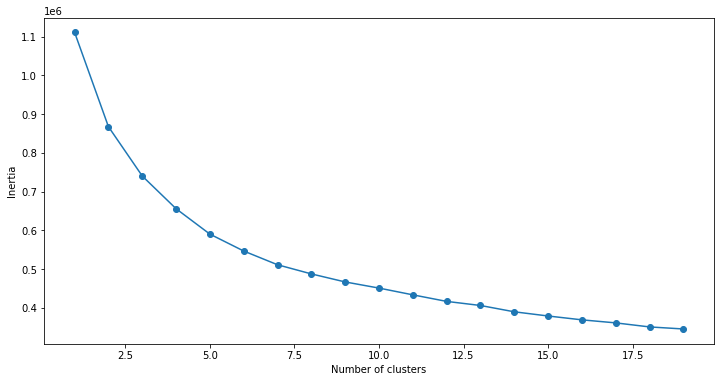

In [21]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(train)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [22]:
kmeans = KMeans(n_clusters = 8, init='k-means++')
kmeans.fit(train)

KMeans()

In [23]:
labels=kmeans.labels_
avg_rating['cluster']=labels
avg_rating['cluster'].value_counts()

3    15136
1    14702
5    10324
4     8761
6     7601
0     4832
7     3698
2     3288
Name: cluster, dtype: int64

In [11]:
avg_rating.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,cluster
0,2.975730,3.102523,3.287429,3.153435,3.065647,3.112014,3.429535,3.200078,3.059346,3.125740,...,3.104027,3.245098,3.061500,3.133494,2.875280,2.955449,3.280059,3.114849,123100.0,1
1,3.218675,3.278409,3.430952,3.277123,3.198239,3.317562,3.454392,3.385017,3.323389,3.422925,...,3.717742,3.225777,3.293011,3.318280,3.067864,3.284207,3.432122,3.221519,117490.0,1
2,3.037611,3.152076,3.266491,3.182584,3.146944,3.208617,3.474199,3.308800,3.140127,3.403553,...,3.044444,3.263848,3.137380,3.286651,2.944948,3.039568,3.404337,3.287805,134596.0,1
3,2.451787,2.501575,2.677083,2.538462,2.475319,2.821602,2.626087,2.701088,2.367403,3.318182,...,2.448864,2.613793,2.700468,2.444181,2.294896,2.648370,2.891931,2.849741,212343.0,7
4,2.880558,3.100902,3.340824,3.108200,3.048586,3.296857,3.557841,3.474390,3.180294,3.987500,...,3.370370,3.375989,3.247277,3.366480,2.857595,3.059807,3.519512,3.301688,242683.0,1


# Takin input from user


In [24]:
#Reading Dataset
movies=pd.read_csv('D:/2nd Sem/PatternRecog/Project/ml-latest/ml-latest/movies.csv')
ratings=pd.read_csv('D:/2nd Sem/PatternRecog/Project/ml-latest/ml-latest/ratings.csv')
ratings=ratings.drop(['timestamp'],axis=1)

#taking rating from user of some popular movies with different genres
def user_input():
    
    #seperating genres into diff columns
    dummies = movies['genres'].str.get_dummies()
    dummies=movies.join(dummies)
    #removing column that r not req.
    dummies.drop(['genres','title','(no genres listed)'],axis=1,inplace = True)
    
    #merging ratings and movies dataframe
    data=pd.merge(ratings,movies,how='outer',on ='movieId')
    data=data.dropna()
    
    # stats to find movies with most ratings i.e. popular movies
    movie_stats = data.groupby('title').agg({'rating': [np.size, np.mean]})
    movie_stats = movie_stats.sort_values([('rating','size')],ascending=False)
    
    #top 100 movies with most ratings
    m=movie_stats[:100]
    m=m.index
    m1=pd.DataFrame(m)
    temp=pd.merge(m1,movies,how='outer',on ='title')
    temp=temp.dropna()
    
    #taking some movies among top100 movies to take input rating from user
    temp2=temp[temp['movieId']==1]
    temp2=temp2.append(temp[temp['movieId']==480])
    temp2=temp2.append(temp[temp['movieId']==527])
    temp2=temp2.append(temp[temp['movieId']==364])
    temp2=temp2.append(temp[temp['movieId']==1617])
    temp2=temp2.append(temp[temp['movieId']==593])
    temp2=temp2.append(temp[temp['movieId']==1721])
    temp2=temp2.append(temp[temp['title']=='Planet Earth (2006)'])
    temp2=temp2.append(temp[temp['movieId']==163])
    temp3=temp2.index
    
    val=[]
    for i in range(9):
        t=float(input('Rate the movie from 1-5:  "{}" [{}]   --->'.format(temp2.iat[i,0],temp2.iat[i,2])))
        val.append(t)
        
    #taking rating given by user in diff dataframe
    input1=dummies[dummies['movieId']==1]
    input1=input1.append(dummies[dummies['movieId']==480])
    input1=input1.append(dummies[dummies['movieId']==527])
    input1=input1.append(dummies[dummies['movieId']==364])
    input1=input1.append(dummies[dummies['movieId']==1617])
    input1=input1.append(dummies[dummies['movieId']==593])
    input1=input1.append(dummies[dummies['movieId']==1721])
    input1=input1.append(dummies[dummies['movieId']==159817])
    input1=input1.append(dummies[dummies['movieId']==163])
    input1['rating']=val
    
    
    #find avg rating for each genre
    col=dummies.drop(['movieId'],axis=1,inplace = True)
    col=dummies.columns
    avg={}
    for i in range(len(col)):
        temp3=(input1[input1[col[i]] == 1])
        if temp3.shape[0]==0:
            temp5=0
        else:
            temp4=np.sum(temp3.rating * temp3[col[i]])
            temp5=temp4/temp3.shape[0]
        avg[col[i]]=temp5
    test1=pd.DataFrame(columns = col)
    test1=test1.append(avg, ignore_index = True)
    
    return test1

In [25]:
#taking input and storing in test variable
test=user_input()

Rate the movie from 1-5:  "Toy Story (1995)" [Adventure|Animation|Children|Comedy|Fantasy]   --->5
Rate the movie from 1-5:  "Jurassic Park (1993)" [Action|Adventure|Sci-Fi|Thriller]   --->4
Rate the movie from 1-5:  "Schindler's List (1993)" [Drama|War]   --->4
Rate the movie from 1-5:  "Lion King, The (1994)" [Adventure|Animation|Children|Drama|Musical|IMAX]   --->4
Rate the movie from 1-5:  "L.A. Confidential (1997)" [Crime|Film-Noir|Mystery|Thriller]   --->2
Rate the movie from 1-5:  "Silence of the Lambs, The (1991)" [Crime|Horror|Thriller]   --->2
Rate the movie from 1-5:  "Titanic (1997)" [Drama|Romance]   --->5
Rate the movie from 1-5:  "Planet Earth (2006)" [Documentary]   --->5
Rate the movie from 1-5:  "Desperado (1995)" [Action|Romance|Western]   --->2


In [26]:
test

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3.0,4.333333,4.5,4.5,5.0,2.0,5.0,4.333333,5.0,2.0,2.0,4.0,4.0,2.0,3.5,4.0,2.666667,4.0,2.0


In [27]:
y=kmeans.predict(test)
print('User belongs to cluster {}'.format(y[0]))

User belongs to cluster 6


In [28]:
def reccomend(test):

    #finding to which cluster user belong to based on input
    y=kmeans.predict(test)
    #GEtting top 10 movies based on cluster to which user belong
    clus=(avg_rating[avg_rating['cluster']==y[0]])
    #taking user id of users to which input usercluster  belong
    user=clus['userId']
    user=pd.DataFrame(user)
    movie_rating_0=pd.merge(user,ratings,how='inner',on ='userId')
    movie_rating_0=movie_rating_0.dropna()
    movie_stats_0 = movie_rating_0.groupby('movieId').agg({'rating': [np.size, np.mean]})
    movie_stats_0 = movie_stats_0.sort_values([('rating','mean')],ascending=False)
    top_movies_0=movie_stats_0[ movie_stats_0[('rating','size')]>5]
    top_mov_id_0=top_movies_0.index
    top10=top_mov_id_0[:10]
    
    
    for i in range(10):
        p=movies.loc[movies['movieId'] == top10[i], 'title'].iloc[0]
        print('{} recommendation : {}'.format(i+1,p))

In [29]:
reccomend(test)

1 recommendation : Midnight Dancers (Sibak) (1994)
2 recommendation : Forbidden Christ, The (Cristo proibito, Il) (1950)
3 recommendation : Entertaining Angels: The Dorothy Day Story (1996)
4 recommendation : Get Over It (1996)
5 recommendation : Sweet Nothing (1996)
6 recommendation : Brother of Sleep (Schlafes Bruder) (1995)
7 recommendation : Hamlet (2009)
8 recommendation : For the Moment (1994)
9 recommendation : North Star (a.k.a. Tashunga) (1995)
10 recommendation : Alice (Neco z Alenky) (1988)
